In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import cmocean
from cartopy import crs as ccrs
import cartopy.feature as cfeature

## 1. Sea level from seismic reflection {-}

**Interpret sea level change from the seismic reflection profile shown below. The figure shows you a real seismic reflection profile (top panel), which has been interpreted (bottom panel) and specific layers have been dated (thick layers with numbers, ages are in Ma). You may use the interpreted version (lower panel) for your analysis. Left is the oceanward side and right is the landward side.**

### a) Mark the clinoform rollover position for layers where it is clearly identifiable with a dot or circle. (It might be easiest to screenshot the figure and then include an annotated version in your response). {-}

![1a](PSet_1_1a.png)

### b) For each time interval describe whether you identify progradation / degradation / aggradation / retrogradation (or a combination of them). {-}

**81 - 73 Ma**: Progradation, until the most recent few layers which are progradation + aggradation (PA).

**73 - 70 Ma**: Aggradation

**70 - 61.5 Ma**: Aggradation, progradation and some degradation (APD)?, then progradation + aggradation (PA) in newest few layers

**61.5 - 58 Ma**: Progradation + aggradation (PA), then mostly progradation

**58 - 55 Ma**: Progradation + aggradation (PA)?

### c) Use your results from a) to describe how local sea level has qualitatively changed from 81 Ma to 55 Ma and provide explanations for your sea level interpretation. {-}

For 81-73 Ma, there is primarily progradation, implying sea level stays constant with sediment input, with aggradation near the end of this period which implies a rise in sea level. Then, for 73-70 Ma, the aggradation implies that sea level rises in this period accompanied by sediment input. For 70-61.5 Ma, the combined APD and PA imply a mostly constant sea level, with a possible small sea level falling some time in the middle of this period and then rising near the end. Then, for 61.5-58 Ma, we see some sea level rise with sediment because of the PA, and the same for 58-55 Ma. For the most part, sea level stays constant, rises, stays constant, and then rises over the entire period. 

### d) Is this an area with generally high sediment input or not? {-}

It seems like this is an area with generally high sediment input, because we see mostly progradation and aggradation patterns over the period, implying there is a sediment supply and depending on whether the sea level rises or stays constant, the sediment builds upwards and/or outwards (towards the ocean). 

##  2. Hypsometry and continental flooding {-}

**Investigate differential sea level change in Australia between the North and the South using hypsometry:**

### a) Produce a hypsometric curve for Australia. To do this load the provided topography grid (etopo_ice_15.mat or etopo_ice_15.txt, whichever format you prefer) and isolate Australia. Since Australia is relatively close to the equator you may assume that a lat-lon projection is equal area. Calculate the cumulative amount of area per elevation (i.e. hypsometric curve), starting at elevation -200m to the highest elevation present. Present two plots, one showing the topographic map isolating Australia that you’re using and the other being the hypsometric curve. In addition to the plots, please submit your code that you use to calculate the hypsometric curve. {-}

In [2]:
# read in with pandas, pivot into xarray dataarray
df = pd.read_csv('etopo_ice_15.txt', delim_whitespace=True, header = 0, names = ['lon', 'lat', 'z'])
df_pv = df.pivot(index="lat", columns="lon")
df_pv.columns = df_pv.columns.droplevel(0)
da = xr.DataArray(data=df_pv).rename('z')

In [3]:
# say "australia" is region in the box defined below where topo >-200m
aus_lons = slice(113.338953078,153.569469029)
aus_lats = slice(-43.6345972634, -10.6681857235)

aus_mask = (da>=-200).sel(lon=aus_lons,lat=aus_lats)
aus = da.where(aus_mask)

In [4]:
# make hypsometry fractions, assuming equal area (each gridpoint = 1 area unit)
zs = np.arange(-200,aus.max()+1,1)
total = aus_mask.sum()
hyps = [((aus<=z).sum()/total).item() for z in zs]

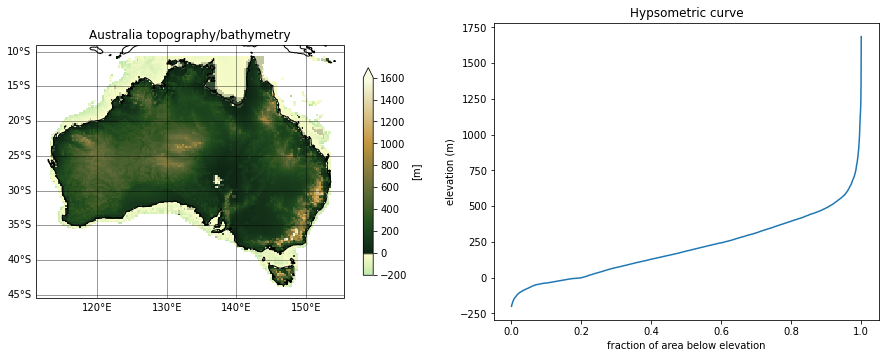

In [5]:
# plot australia used and hypsometric curve
fig, ax = plt.subplots(1,2, figsize=(12,6))
cmap = cmocean.cm.topo
cmap1 =  cmocean.tools.crop(cmap, vmin= -200, vmax = 1600, pivot = 0)

ax[0] = plt.subplot(1,2,1, projection=ccrs.PlateCarree())
ax[0].add_feature(cfeature.COASTLINE.with_scale('50m'))
gl = ax[0].gridlines(draw_labels=True, color='k', alpha = 0.5)
gl.top_labels = False
gl.right_labels = False
aus.plot(ax=ax[0], vmin= -200, vmax = 1600, cmap=cmap1,transform=ccrs.PlateCarree(),cbar_kwargs={'shrink':0.7,'label':'[m]'})
ax[0].set_title('Australia topography/bathymetry')

ax[1].plot(hyps,zs)
ax[1].set_title('Hypsometric curve')
ax[1].set_ylabel('elevation (m)')
ax[1].set_xlabel('fraction of area below elevation')

plt.tight_layout();

### b) Now we will compare hypsometry in the northern part of the island versus the southern part. First, remove areas that have undergone recent volcanism and basin formation. To do that you can remove areas east of 135oE in your analysis. Next produce a hypsometric curve for the northern part (you may choose this to be north of 25oS) and the southern part (you may choose this to be south of 25oS). Present again two plots, one showing the topographic map isolating the northern and southern region that you’re using (could be two separate plots) and the other being the hypsometric curves for each region. {-}

In [6]:
# make western australia hypsometry
aus_b = aus.where(aus.lon<=135)
zs_b = np.arange(-200,aus_b.max()+1,1)
total = (aus_b>=-200).sum()
hyps_b = [((aus_b<=z).sum()/total).item() for z in zs_b]

# north
aus_n = aus_b.lat >= -25
aus_b_n = aus_b.where(aus_n)
zs_n = np.arange(-200,aus_b_n.max()+1,1)
total = (aus_b_n>=-200).sum()
hyps_n = [((aus_b_n<=z).sum()/total).item() for z in zs_n]

# south
aus_s = aus_b.lat < -25
aus_b_s = aus_b.where(aus_s)
zs_s = np.arange(-200,aus_b_s.max()+1,1)
total = (aus_b_s>=-200).sum()
hyps_s = [((aus_b_s<=z).sum()/total).item() for z in zs_s]

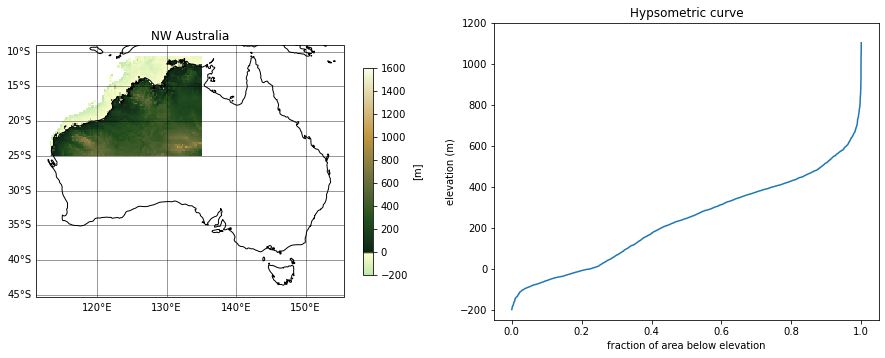

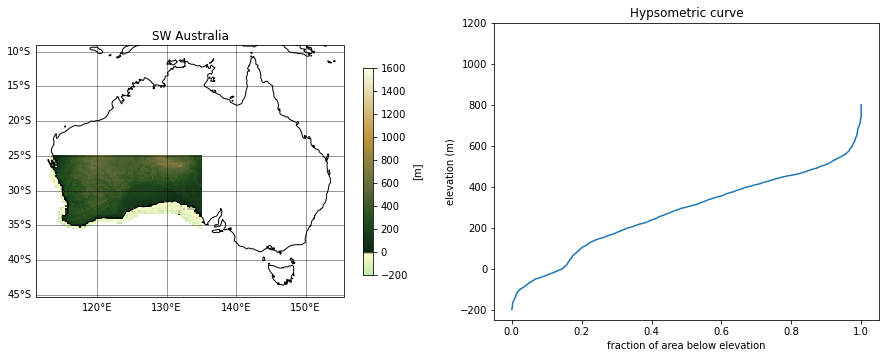

In [7]:
# plot em
zs_ns = [zs_n, zs_s]
hyps_ns = [hyps_n,hyps_s]
aus_b_ns = [aus_b_n,aus_b_s]
titles = ['NW Australia','SW Australia']

for i in range(len(zs_ns)):
    fig, ax = plt.subplots(1,2, figsize=(12,6))

    ax[0] = plt.subplot(1,2,1, projection=ccrs.PlateCarree())
    ax[0].add_feature(cfeature.COASTLINE.with_scale('50m'))
    gl = ax[0].gridlines(draw_labels=True, color='k', alpha = 0.5)
    gl.top_labels = False
    gl.right_labels = False
    mappable = aus_b_ns[i].plot(ax=ax[0],vmin = -200, vmax=1600, cmap= cmap1,transform=ccrs.PlateCarree(),cbar_kwargs={'shrink':0.7,'label':'[m]'})
    ax[0].set_title(titles[i])


    ax[1].plot(hyps_ns[i],zs_ns[i])
    ax[1].set_title('Hypsometric curve')
    ax[1].set_ylabel('elevation (m)')
    ax[1].set_xlabel('fraction of area below elevation')
    ax[1].set_ylim([-250,1200])
    plt.tight_layout();



### c) Assuming 30% of the northern and southern part of the continent from b) (including shelves down to -200m) was flooded during the Miocene. At what elevation would you find the Miocene paleo shoreline today? What does that tell you about the relative motion between the northern and the southern part of the continent? {-}

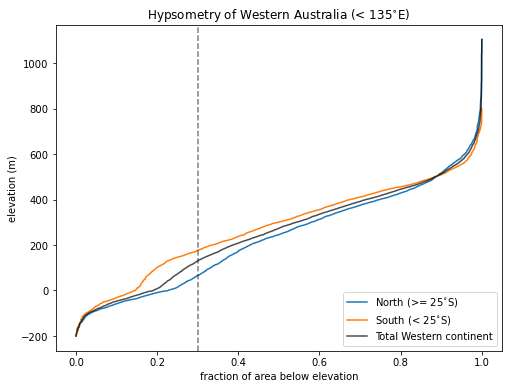

In [8]:
# plot all the hypsometric curves together
plt.figure(figsize=(8,6))
plt.plot(hyps_n,zs_n,label='North (>= 25$^{\circ}$S)')
plt.plot(hyps_s,zs_s,label='South (< 25$^{\circ}$S)')
plt.plot(hyps_b,zs_b, label='Total Western continent',c='k',alpha=0.7)
plt.axvline(0.3,c='k',alpha=0.5,ls='--')
plt.ylabel('elevation (m)')
plt.xlabel('fraction of area below elevation')
plt.title('Hypsometry of Western Australia (< 135$^{\circ}$E)')
plt.legend();

In [9]:
# find 30%
from bisect import bisect_left as bl

idx_30 = [bl(h,.3) for h in [hyps_b,hyps_n, hyps_s]] 
z_30 = [z[idx] for z,idx in zip([zs_b,zs_n,zs_s],idx_30)]

print(f'Today, the Miocene paleo shoreline is at:\n%.0f m for the whole Western continent, or,\n%.0f m for the northern part of the continent \n%.0f m for the southern part of the continent.' 
      %(tuple(z_30)) )


Today, the Miocene paleo shoreline is at:
131 m for the whole Western continent, or,
66 m for the northern part of the continent 
177 m for the southern part of the continent.


This implies that sea level has fallen more in the southern part of the continent than the northern part of the continent since the Miocene, or that the southern part of the continent has risen relative to the northern part.

## 3. Mid-ocean ridge spreading rate changes and sea level change {-}

**Calculate the amount of sea level rise during faster mid ocean ridge spreading. Consider a 2D transect through an ocean basin (see figure below) that stores 20,000 km2 of water.**

**Mantle temperature 1300oC, ocean bottom temperature 10oC, thermal diffusivity 10-6 m2/s, thermal expansivity 3x10-5 1/K, density of water 1000 kg/m3, density of sublithospheric mantle 3000 kg/m3**


![3](PSet_1_3.png)

For the purposes of this problem, I've defined a few more depth quantities in the image above. $W_0$ is the water depth below the ridge at horizontal distance D from the ridge, and $W'_0$ is the depth from the surface of the ocean to the ridge, such that $H_0$ as defined in the problem is equal to $W_0+W'_0$. $W_1$ and $W'_1$ are defined in the same way for the new spreading rate in part b), such that $\Delta H = W'_1 - W'_0$.

### a) What is H<sub>0</sub>  if we assume a half-spreading rate of 5cm/yr. You can use the values for constants listed below. Show the equations you are using – if you use pen and paper feel free to submit a photo of it or use a phone app like ‘Tiny Scanner’ to scan it. {-}

To solve for $H_0$, we need to know both $W_0$, which we can solve for directly using the equation for $W(x)$, and $W'_0$. To solve for $W'_0$, we will need to integrate for the area of the cross-section that holds water below the ridge, and subtract that from the total area of water in the cross section to get the amount of water above the ridge. Then we can divide that area by $2D=5000$ km to get $W'_0$. 

We start with the equation derived in class (lecture 5) for the water depth from the ridge as a function of half-spreading rate and distance from the ridge:
$$
W(x) = \frac{2\rho_m \alpha (T_s - T_m) \frac{\sqrt{\kappa}}{\sqrt{\pi u}}}{\rho_w - \rho_m} x^{1/2}.
$$

All of the quantities in this equation are given explicitly in the problem statement: 

$\rho_m=3000$ kg/m$^3$,   
$\alpha=3\times10^{-5}$ K$^{-1}$,  
$T_s = 10$ $^{\circ}$C = 283.15 K,  
$T_m = 1300$ $^{\circ}$C = 1573.15 K,  
$\kappa = 10^{-6}$ m$^2$/s,  
$\rho_w=1000$ kg/m$^3$,  
$u = 5$ cm/year $= 3.17 \times 10^{-10}$ m/s  
and $0\leq x \leq 2500$ km $= 2.5 \times 10^6$ m.


Now we can solve for $W_0$ by plugging everything into the initial equation with $x=D= 2.5 \times 10^6$ m, noticing that the units will cancel to a height in meters:
$$
W_0 = W(2.5 \times 10^6 \textrm{ m}) = \frac{2 \times 3000 \times 3\times10^{-5}(283.15-1573.15)\frac{\sqrt{10^{-6}}}{\sqrt{\pi 3.17 \times 10^{-10}}}}{1000-3000}(2.5 \times 10^6)^{1/2} = 2601 \textrm{ m}.
$$

Next, we want to know what area of the cross section below the ridge contains water. This is equal to twice the integral of $W(x)$ over $0\leq x \leq 2500$ km:

$$
\begin{split}
2 \times \int_{0}^{2.5 \times 10^6}{W(x)}dx &= 2 \times \int_{0}^{2.5 \times 10^6}{\frac{2 \times 3000 \times 3\times10^{-5}(283.15-1573.15)\frac{\sqrt{10^{-6}}}{\sqrt{\pi 3.17 \times 10^{-10}}}}{1000-3000}x^{1/2}}dx \\
&= 3.29 \textrm{ m}^{1/2} \int_{0}^{2.5 \times 10^6 \textrm{m}}{x^{1/2}}dx  \\
&= 3.29 \textrm{ m}^{1/2} \times \frac{2}{3} [{2.5 \times 10^6 \textrm{m}}]^{3/2} \\
&= 8.671 \times 10^9 \textrm{ m}^2 \\
&= 8671 \textrm{ km}^2.
\end{split}
$$

Now, to find $W'_0$, we subtract the area below the ridge (7079 km$^2$) from the total area of water (20,000 km$^2$), which gives us the area of the rectangle of water above the ridge, and divide that by $2D=5000$ km:
$$
W'_0 = \frac{20000 \textrm{ km}^2 - 7079 \textrm{ km}^2}{5000 \textrm{ km}} = 2.266 \textrm{ km} = 2266 \textrm{ m}.
$$

Finally, $\mathbf{H_0} = W_0 + W'_0 = 2601 \textrm{ m} + 2266 \textrm{ m} = \mathbf{4867} \textrm{ m}$.

### b) Assume an increase in half-spreading rate (dashed black and blue lines) to 7cm/yr. Determine H1 and DH. Show your work {-}

First, we can solve for $W_1$ in the same way as in a), but substituting the spreading rate $u$, which becomes $7$ cm/year $= 2.22 \times 10^{-9}$ m/s:
$$
W_1 = \frac{2 \times 3000 \times 3\times10^{-5}(283.15-1573.15)\frac{\sqrt{10^{-6}}}{\sqrt{\pi 2.22 \times 10^{-9}}}}{1000-3000}(2.5 \times 10^6)^{1/2} = 2198 \textrm{ m}.
$$

We solve for the area of water under the ridge in the same way as a):

$$
\begin{split}
2 \times \int_{0}^{2.5 \times 10^6}{W(x)}dx &= 2 \times \int_{0}^{2.5 \times 10^6}{\frac{2 \times 3000 \times 3\times10^{-5}(283.15-1573.15)\frac{\sqrt{10^{-6}}}{\sqrt{\pi 2.22 \times 10^{-9}}}}{1000-3000}x^{1/2}}dx \\
&= 2.781 \textrm{ m}^{1/2} \int_{0}^{2.5 \times 10^6 \textrm{m}}{x^{1/2}}dx \\
&= 2.781 \textrm{ m}^{1/2} \times \frac{2}{3} [{2.5 \times 10^6 \textrm{m}}]^{3/2} \\
&= 7.328 \times 10^9 \textrm{ m}^2 \\
&= 7328 \textrm{ km}^2.\\
\end{split}
$$

Again, using the same calculation as in a), $W'_1$ is:
$$
W'_1 = \frac{20000 \textrm{ km}^2 - 7328 \textrm{ km}^2}{5000 \textrm{ km}} = 2.534 \textrm{ km} = 2534 \textrm{ m}.
$$


So we can get $\mathbf{\Delta H} = W'_1 - W'_0 = 2534 \textrm{ m} - 2266 \textrm{ m} = \mathbf{268 \textrm{ m}}$.

And finally, $\mathbf{H_1} = H_0 + \Delta H = 4867 + 268 = \mathbf{5135 \textrm{ m}}$. 

### c) The figure below assumes passive margins, i.e. no subduction of the oceanic crust underneath the continents to the side. Could the presence of subduction zones affect DH and if so, would it lead to a decrease or increase in DH? {-}

Subduction zones would likely decrease $\Delta H$, because they would increase the amount of area under the ridge that can hold water, therefore making it less necessary for sea level to be pushed up as far above the ridge.